In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.preprocessing import LabelEncoder
import copy
from scipy.cluster.hierarchy import dendrogram, linkage

In [147]:
car_pd = pd.read_csv("CarPrice.csv")
car_pd

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [148]:
# 分析非数值型数据
word_columns = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']
for col in word_columns:
    print(col,":",car_pd[col].unique())

symboling : [ 3  1  2  0 -1 -2]
fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [149]:
car_data = car_pd.copy()
car_pd.pop('car_ID')
car_pd.pop('CarName')
car_pd["cylindernumber"] = car_pd["cylindernumber"].replace(
    {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
car_pd.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [150]:
num_columns = car_pd.columns.drop(word_columns)


In [151]:
print(num_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [152]:
def OneHotEncoder(dataframe, column):
    obj = dataframe[column].unique().tolist()
    for i in range(len(dataframe)):
        dataframe.loc[i,column] = obj.index(dataframe.loc[i,column])

In [153]:
#去重查看CarName
print(car_data['CarName'].drop_duplicates()) #验证是否object全部改为数值类型


0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


In [154]:
#利用split，由CarName拆出品牌信息
carBrand = car_data['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(carBrand))


{'audi', 'volvo', 'vw', 'jaguar', 'nissan', 'toyouta', 'dodge', 'saab', 'mercury', 'mazda', 'buick', 'plymouth', 'maxda', 'alfa-romero', 'toyota', 'porcshce', 'subaru', 'Nissan', 'isuzu', 'honda', 'chevrolet', 'vokswagen', 'bmw', 'porsche', 'mitsubishi', 'volkswagen', 'peugeot', 'renault'}


In [155]:
#修改品牌名称的不规则命名
carBrand = carBrand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(set(carBrand))

#将carBrand放入原数据集中
car_data['carBrand'] = carBrand
print(len(set(carBrand)))

{'audi', 'volvo', 'jaguar', 'nissan', 'dodge', 'saab', 'mercury', 'mazda', 'buick', 'plymouth', 'alfa-romero', 'toyota', 'subaru', 'isuzu', 'honda', 'chevrolet', 'bmw', 'porsche', 'mitsubishi', 'volkswagen', 'peugeot', 'renault'}
22


In [156]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


在汽车销售等实际业务中，很多消费者购买需求有时会根据考虑车型的大小来考虑。
欧系分类，按德国标准，车型大小可按照车长，轴距划分为6类：(单位：英寸)
按车身长度分类界限：微型车： A00 <145.67 ；小型车： A0 <169.29 ；紧凑型车：A <181.10 ；中型车： B <192.91 ；中大型车：C <200.79 ；大型车： D >200.79

In [157]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为6类
bins=[min(car_pd.carlength)-0.01,145.67,169.29,181.10,192.91,200.79,max(car_pd.carlength)+0.01]
label=['A00','A0','A','B','C','D']
carSize=pd.cut(car_pd.carlength,bins,labels=label)
print(carSize.unique())

#将车型大小分类放入数据集中
car_data['carSize']=carSize
car_pd['carSize']=carSize


['A0', 'A', 'B', 'C', 'A00', 'D']
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']


In [158]:
#查看数值型特征的相关系数
df_corr = car_pd.corr()
df_corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


相关系数分类： 0.8-1.0 极强相关；0.6-0.8 强相关；0.4-0.6 中等程度相关；0.2-0.4 弱相关；0.0-0.2 极弱相关或无相关
由热力图可看出： 车长、宽、轴距三者都极强相关，整备质量和车长、宽、发动机尺寸极强相关，价格与车整备质量、发动机尺寸、马力具有极强相关性，等等。部分数据之间存在高度相似，数据存在冗余。

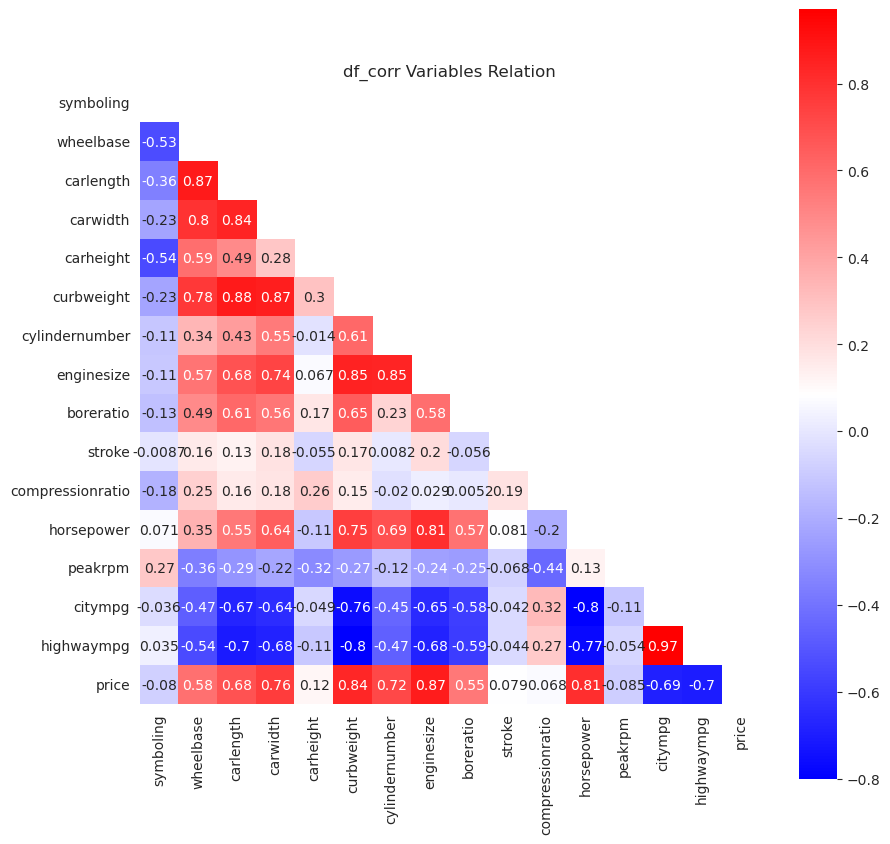

In [159]:
# 绘制相关性热力图
mask=np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax=sns.heatmap(df_corr,mask=mask,square=True,annot=True,cmap='bwr')
ax.set_title("df_corr Variables Relation")
plt.show()

In [160]:
#剔除carlength
features=car_pd.drop(['carlength'],axis=1)

# 将取值具有大小意义的类别型变量数据转变为数值型映射
features1=features.copy()

#使用LabelEncoder对不具实体数值数据编码
carSize1=LabelEncoder().fit_transform(features1['carSize'])
features1['carSize']=carSize1
print(features['carSize'].unique())
print(features1['carSize'].unique())

['A0', 'A', 'B', 'C', 'A00', 'D']
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']
[1 0 3 4 2 5]


In [161]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
cate=features1.select_dtypes(include='object').columns
print(cate)
features1=features1.join(pd.get_dummies(features1[cate])).drop(cate,axis=1)
features1.head()


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,65.5,52.4,2823,6,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,66.2,54.3,2337,4,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,66.4,54.3,2824,5,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [162]:
data = features1
normalized_data = (data - data.mean())/data.std()
normalized_data =normalized_data.fillna(normalized_data.mean())
print(type(normalized_data))
normalized_data 


<class 'pandas.core.frame.DataFrame'>


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.739213,-1.686643,-0.842719,-2.015483,-0.014531,-0.352025,0.074267,0.517804,-1.834886,-0.287645,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
1,1.739213,-1.686643,-0.842719,-2.015483,-0.014531,-0.352025,0.074267,0.517804,-1.834886,-0.287645,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
2,0.133183,-0.706865,-0.190101,-0.542200,0.513625,1.498364,0.602571,-2.399008,0.684271,-0.287645,...,3.833691,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
3,0.936198,0.173274,0.136209,0.235366,-0.419770,-0.352025,-0.430023,-0.516003,0.461055,-0.035885,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
4,0.936198,0.106848,0.229440,0.235366,0.515545,0.573169,0.218350,-0.516003,0.461055,-0.539405,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,1.717669,1.394830,0.726460,0.761377,-0.352025,0.338419,1.662375,-0.336147,-0.161765,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
201,-1.472847,1.717669,1.348215,0.726460,0.947672,-0.352025,0.338419,1.662375,-0.336147,-0.363173,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
202,-1.472847,1.717669,1.394830,0.726460,0.876611,1.498364,1.106861,0.923942,-1.229012,-0.337997,...,3.833691,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
203,-1.472847,1.717669,1.394830,0.726460,1.270327,1.498364,0.434474,-1.180593,0.461055,3.236992,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,3.033954,-0.069843,-0.917996,-0.213762,-0.069843


利用PCA对高维数据进行降维。
目的：在信息损失较小的前提下，将高维数据转换到低维，从而减少计算量。把可能具有线性相关的高维变量合成线性无关的低维变量，成为主成分。保留最大的方差方向，使从变换特征回到原始特征的误差最小。

In [163]:
def pca(X,num_components):    # 使用 PCA 对高位数据进行降维
    cov_mat = np.cov(X , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose()).transpose()
    return X_reduced

In [164]:
# PCA
reduced_data = pca(normalized_data,2)
reduced_data = pd.DataFrame(reduced_data,columns=['pc1','pc2'])
reduced_data = reduced_data-reduced_data.min()
reduced_data


,pc1,pc2
0,6.528816,10.800553
1,6.632435,10.823973
2,7.447100,9.876619
3,5.197423,6.903481
4,6.995344,7.672512
...,...,...
200,8.795214,6.310207
201,9.975090,6.048241
202,10.734695,7.581324
203,9.741580,0.859182


In [165]:
# 寻找最优簇数 'K' 的函数
def findk(range_k):
  epsilon = list(range(range_k)) # 在最后一次迭代后，存储每个 k 值的成本函数。

  for k in range(1,range_k+1): # 簇数
      cluster = reduced_data.copy() # 读取数据集
      rows = cluster.shape[0]  # 数据集的行数
      cols = cluster.shape[1]  # 数据集的列数
      centroids = cluster.loc[np.random.randint(1, rows+1, k)] # 随机初始化 k 个中心点 
      centroids['new'] = list(range(1, k+1)) 
      centroids.set_index('new', inplace = True) 
      d = np.random.rand(rows) # 包含最接近数据点的中心点数
      number_of_iterations = 20
      temp_epsilon = list(range(number_of_iterations)) # 每次迭代时，点与聚类中心点之间距离的平方和

      for i in range(0,number_of_iterations): # 迭代循环
          for j in range(0,rows): # 寻找到最接近数据点的中心点
              d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
          cluster['centroid number'] = d 
          mean_x = list(range(k)) # 存储每个簇的 x 平均值
          mean_y = list(range(k)) # 存储每个簇的 y 平均值
          for m in range(0,k):    # 计算每个簇的 x 和 y 平均值
              mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['pc1'].mean()
              mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['pc2'].mean()
          centroids.replace(list(centroids['pc1']), mean_x, inplace = True) # 中心点被替换为新值
          centroids.replace(list(centroids['pc2']), mean_y, inplace = True)
          z = list(range(k)) # 初始化每个簇的 z 和中心点
          
          for p in range(0,k): # 计算每个簇的数据点和中心点之间的距离的平方
              z[p] = ((cluster[cluster['centroid number'] == p+1][['pc1','pc2']] - centroids.iloc[p])**2).values.sum()
          temp_epsilon[i] = z[p]
          epsilon[k-1] = temp_epsilon[i] # 存储每个 k 值的最终迭代后的成本函数
      print(temp_epsilon[i])
      %reset_selective -f centroids # 重置中心点
  return epsilon

In [167]:
rangek = 10
epsilon = findk(rangek)

3382.650357739049
1004.5167064554748
593.3298581810645
244.81686372216808
199.51565636652975
99.35881750943187
0.0
39.76356419160152
32.59334708640516
0.0


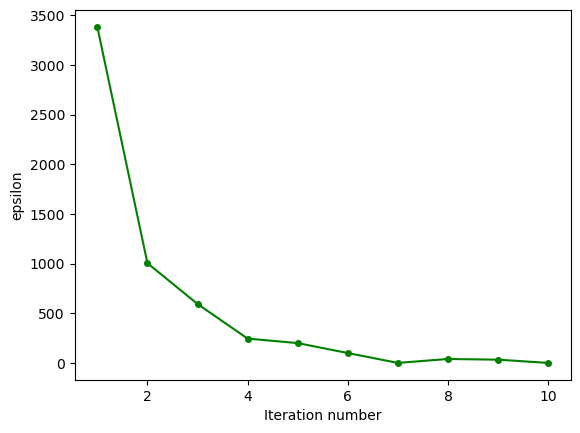

In [168]:
# 绘制均方误差与簇数
import matplotlib.pyplot as plt
a = list(range(1,rangek+1)) 
plt.plot(a, [x for x in epsilon], 'go-', linewidth=1.5, markersize=4)
plt.xlabel('Iteration number') 
plt.ylabel('epsilon')
plt.show()

In [169]:
# k-means 聚类函数
def k_means(cluster,k):
  # 读取数据
  rows = cluster.shape[0]  # 数据集行数
  cols = cluster.shape[1]  # 数据集列数

  centroids = cluster.loc[np.random.randint(1,rows+1,k)] # 随机初始化k个中心点
  centroids['new'] = list(range(1,k+1)) 
  centroids.set_index('new',inplace = True) 
  d = np.random.rand(rows)  # 包含最接近数据点的中心点数

  number_of_iterations = 20
  temp_epsilon = list(range(number_of_iterations)) # 每次迭代时，点与聚类中心点之间距离的平方和

  for i in range(0,number_of_iterations): # 迭代循环
      for j in range(0,rows): # 寻找到最接近数据点的中心点
          d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
      cluster['centroid number'] = d 
      mean_x = list(range(k)) # 存储每个簇的 x 平均值
      mean_y = list(range(k)) # 存储每个簇的 y 平均值
      for m in range(0,k):    # 计算每个簇的 x 和 y 平均值
          mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['pc1'].mean()
          mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['pc2'].mean()
      centroids.replace(list(centroids['pc1']),mean_x,inplace = True) # 替换中心点
      centroids.replace(list(centroids['pc2']),mean_y,inplace = True)
  return cluster

In [170]:
kmeans = k_means(reduced_data,6)
kmeans.astype({'centroid number':'int32'}).dtypes
kmeans.head(10)

,pc1,pc2,centroid number
0,6.528816,10.800553,6.0
1,6.632435,10.823973,6.0
2,7.447100,9.876619,6.0
3,5.197423,6.903481,2.0
4,6.995344,7.672512,2.0
5,5.832570,8.440394,2.0
6,7.810161,6.665106,4.0
7,7.921773,6.743504,4.0
8,9.039816,6.308887,4.0
9,7.559632,8.734005,6.0


Text(0.5, 1.0, 'K-Means clustering')

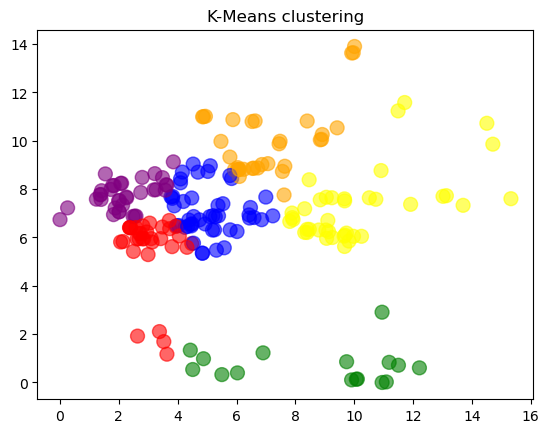

In [171]:
# 绘制K均值的聚类
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
kmeans['c'] = kmeans['centroid number'].map({ 1:colors[0], 2:colors[1],3:colors[2],4:colors[3],5:colors[4],6:colors[5]})
plt.scatter(kmeans.pc1, kmeans.pc2 , c=kmeans.c,  alpha = 0.6, s=100)
plt.title("K-Means clustering")

In [172]:
kmeans

,pc1,pc2,centroid number,c
0,6.528816,10.800553,6.0,orange
1,6.632435,10.823973,6.0,orange
2,7.447100,9.876619,6.0,orange
3,5.197423,6.903481,2.0,blue
4,6.995344,7.672512,2.0,blue
...,...,...,...,...
200,8.795214,6.310207,4.0,yellow
201,9.975090,6.048241,4.0,yellow
202,10.734695,7.581324,4.0,yellow
203,9.741580,0.859182,3.0,green


In [173]:
# 统计聚类后每个集群的车型数
kmeans.groupby('centroid number')['pc1'].count()

centroid number
1.0    33
2.0    48
3.0    16
4.0    40
5.0    35
6.0    33
Name: pc1, dtype: int64

In [174]:
df = car_data.loc[:,['car_ID','CarName','carBrand']] 
df['centroid number'] = kmeans.loc[:,['centroid number']]
df.loc[df['centroid number']==1.0]

,car_ID,CarName,carBrand,centroid number
20,21,chevrolet vega 2300,chevrolet,1.0
25,26,dodge colt hardtop,dodge,1.0
26,27,dodge colt (sw),dodge,1.0
35,36,honda accord lx,honda,1.0
36,37,honda civic 1500 gl,honda,1.0
39,40,honda prelude,honda,1.0
40,41,honda accord,honda,1.0
45,46,isuzu D-Max V-Cross,isuzu,1.0
53,54,mazda rx-4,mazda,1.0
54,55,mazda glc deluxe,mazda,1.0


In [175]:
# 提取volkswagen品牌的车型
print(" K-Means 的汽车产品聚类分析 ".center(100,"="))
CompPro = df.copy()
VWCluster = set(CompPro[CompPro['carBrand'] == 'volkswagen']['centroid number'])
print('Volkswagen品牌产品对应的类别为: ', VWCluster, '\n')

# 提取volkswagen品牌的竞品车型
CompVW = CompPro[CompPro['carBrand'] == 'volkswagen']
CompOther = CompPro[CompPro['carBrand'] != 'volkswagen']
for i in VWCluster:
    print('Volkswagen品牌的第' + str(i) + '类产品包含如下车型：\n', set(CompVW[CompVW['centroid number'] == i]['CarName'])), '\n'
    print('Volkswagen品牌的第' + str(i) + '类产品的竞品车型为：\n', set(CompOther[CompOther['centroid number'] == i]['CarName']), '\n')

======================================== K-Means 的汽车产品聚类分析 =========================================
Volkswagen品牌产品对应的类别为:  {1.0, 2.0, 3.0, 5.0} 

Volkswagen品牌的第1.0类产品包含如下车型：
 {'volkswagen model 111', 'vokswagen rabbit'}
Volkswagen品牌的第1.0类产品的竞品车型为：
 {'nissan latio', 'nissan titan', 'toyota corona', 'dodge colt (sw)', 'nissan note', 'toyota corona hardtop', 'honda accord lx', 'dodge colt hardtop', 'chevrolet vega 2300', 'toyota corolla 1200', 'mazda glc deluxe', 'mazda rx-4', 'toyota corolla', 'mazda glc custom l', 'honda accord', 'nissan gt-r', 'isuzu D-Max V-Cross', 'plymouth fury gran sedan', 'honda civic 1500 gl', 'toyota corolla 1600 (sw)', 'subaru', 'nissan nv200', 'honda prelude', 'nissan rogue', 'toyota carina', 'toyota mark ii', 'plymouth satellite custom (sw)'} 

Volkswagen品牌的第2.0类产品包含如下车型：
 {'volkswagen 411 (sw)', 'volkswagen 1131 deluxe sedan', 'vw dasher', 'volkswagen rabbit', 'volkswagen dasher', 'volkswagen type 3'}
Volkswagen品牌的第2.0类产品的竞品车型为：
 {'audi 100ls', 'bmw 320i', 

In [176]:
# 模型评价指标1：信息熵
from math import log
def InfoEntropy(Data, Type):
    Num = len(Data)             # 数据集样本个数
    ClassCount = {}             # 每个类别的个数
    for i in range(Num):
        Row = Data.iloc[i,:]
        Label = Row[Type]      # 提取每行的类别
        if Label not in ClassCount.keys(): 
            ClassCount[Label] = 0
        ClassCount[Label] += 1 
    Entropy = 0.0
    for key in ClassCount:
        Prob = float(ClassCount[key]) / Num       # 计算每个类别的概率
        Entropy -= Prob * log(Prob, 2)            # 信息熵计算公式
    return Entropy

# 模型评价指标2：戴维森堡丁指数
from sklearn.metrics import davies_bouldin_score
def DBI(Data, Type):
    Score = davies_bouldin_score(Data.drop(columns = [Type]), Data[Type])
    return Score

# 模型评价指标3：轮廓系数
from sklearn.metrics import silhouette_score
def SilhouetteScore(X, Y):
    Score = silhouette_score(X, Y)
    return Score

In [177]:
# K-Means 模型评价指标计算
Evaluation = kmeans[['pc1','pc2','centroid number']]
print( " K-Means 的聚类评价指标 ".center(30,"="))
print('信息熵：', InfoEntropy(Evaluation, 'centroid number'))
print('戴维森堡丁指数：', DBI(Evaluation, 'centroid number'))
print('轮廓系数：', SilhouetteScore(kmeans[['pc1','pc2']], Evaluation['centroid number']))

====== K-Means 的聚类评价指标 =======
信息熵： 2.5213813614525598
戴维森堡丁指数： 0.9088101086739909
轮廓系数： 0.3411077461371611


### K-Mediods

In [178]:
# k-mediods 函数
def k_mediods(dataframe,k):
  rows = dataframe.shape[0] # 数据集行数
  cols = dataframe.shape[1] # 数据集列数
  mediods = dataframe.loc[np.random.randint(1,rows+1,k)]
  mediods['new'] = list(range(1,k+1)) 
  mediods.set_index('new',inplace = True)
  d = np.random.rand(rows)
  for j in range(0,rows): # 寻找到最接近数据点的中心点
    d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
  dataframe['cluster']=d
  no_of_iterations=30
  
  for it in range(no_of_iterations):
    fg=1
    while(fg==1):
      fg=0
      o_random=dataframe.loc[np.random.randint(1,rows+1)]
      for i in range(len(mediods)):
        o_mediod=[mediods.iloc[i,0],mediods.iloc[i,1]]  # 随机选一个点
        cluster_no=dataframe[dataframe['pc1']==o_mediod[0]]
        cluster_no=list(dataframe[dataframe['pc2']==o_mediod[1]]['cluster'])
        prev_cost=0
        after_cost=0
        temp_df=dataframe[dataframe['cluster']==cluster_no[0]]
        for a in range(len(temp_df)):
          prev_cost=prev_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) # 交换前的成本
        mediods.iloc[i,0],mediods.iloc[i,1]=o_random['pc1'],o_random['pc2']
        for a in range(len(temp_df)):
            after_cost= after_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) # 交换后的成本
        if(after_cost>=prev_cost):
          mediods.iloc[i,0],mediods.iloc[i,1]=o_mediod[0],o_mediod[1] # 如果 after_cost >= prev_cost，不需要交换
        else:
          fg=1
          break
    for j in range(0,rows): # # 寻找到最接近数据点的中心点
      d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
    dataframe['cluster']=d
  return dataframe

In [179]:
reduced_data.pop("centroid number")
reduced_data.pop("c")

0      orange
1      orange
2      orange
3        blue
4        blue
        ...  
200    yellow
201    yellow
202    yellow
203     green
204    yellow
Name: c, Length: 205, dtype: object

In [181]:
kmediods = k_mediods(copy.deepcopy(reduced_data),6)
kmediods.astype({'cluster':'int32'}).dtypes
kmediods.head(10)

,pc1,pc2,cluster
0,6.528816,10.800553,2.0
1,6.632435,10.823973,2.0
2,7.447100,9.876619,4.0
3,5.197423,6.903481,1.0
4,6.995344,7.672512,4.0
5,5.832570,8.440394,1.0
6,7.810161,6.665106,4.0
7,7.921773,6.743504,4.0
8,9.039816,6.308887,4.0
9,7.559632,8.734005,4.0


Text(0.5, 1.0, 'K-Mediods clustering')

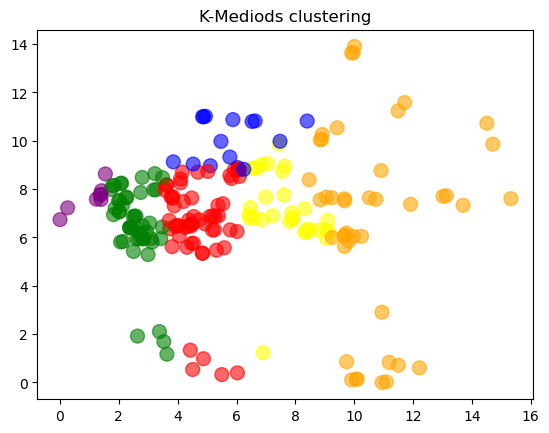

In [182]:
# 绘制K-mediods的聚类
kmediods['c'] = kmediods['cluster'].map({ 1:colors[0], 2:colors[1], 3:colors[2], 4:colors[3], 5:colors[4], 6:colors[5]})
plt.scatter(kmediods.pc1, kmediods.pc2, c=kmediods.c,  alpha = 0.6, s=100)
plt.title("K-Mediods clustering")

In [183]:
# 统计聚类后每个集群的车型数
kmediods.groupby('cluster')['pc1'].count()

cluster
1.0    59
2.0    15
3.0    49
4.0    31
5.0     8
6.0    43
Name: pc1, dtype: int64

In [184]:
df = car_data.loc[:,['car_ID','CarName','carBrand']] 
df['cluster'] = kmediods.loc[:,['cluster']]
df.loc[df['cluster']==1.0]

,car_ID,CarName,carBrand,cluster
3,4,audi 100 ls,audi,1.0
5,6,audi fox,audi,1.0
10,11,bmw 320i,bmw,1.0
23,24,dodge d200,dodge,1.0
27,28,dodge coronet custom,dodge,1.0
28,29,dodge dart custom,dodge,1.0
39,40,honda prelude,honda,1.0
41,42,honda civic,honda,1.0
42,43,honda civic (auto),honda,1.0
43,44,isuzu MU-X,isuzu,1.0


In [185]:
# 提取volkswagen品牌的车型
print(" K-Mediods 的汽车产品聚类分析 ".center(100,"="))
CompPro = df.copy()
VWCluster = set(CompPro[CompPro['carBrand'] == 'volkswagen']['cluster'])
print('Volkswagen品牌产品对应的类别为: ', VWCluster, '\n')

# 提取volkswagen品牌的竞品车型
CompVW = CompPro[CompPro['carBrand'] == 'volkswagen']
CompOther = CompPro[CompPro['carBrand'] != 'volkswagen']
for i in VWCluster:
    print('Volkswagen品牌的第' + str(i) + '类产品包含如下车型：\n', set(CompVW[CompVW['cluster'] == i]['CarName'])), '\n'
    print('Volkswagen品牌的第' + str(i) + '类产品的竞品车型为：\n', set(CompOther[CompOther['cluster'] == i]['CarName']), '\n')

======================================= K-Mediods 的汽车产品聚类分析 ========================================
Volkswagen品牌产品对应的类别为:  {1.0, 2.0, 3.0, 4.0} 

Volkswagen品牌的第1.0类产品包含如下车型：
 {'volkswagen 411 (sw)', 'volkswagen 1131 deluxe sedan', 'volkswagen rabbit custom', 'volkswagen super beetle', 'volkswagen dasher', 'volkswagen type 3'}
Volkswagen品牌的第1.0类产品的竞品车型为：
 {'bmw 320i', 'mazda glc custom', 'mitsubishi outlander', 'toyota corona', 'dodge d200', 'honda civic', 'honda civic (auto)', 'mitsubishi pajero', 'isuzu MU-X', 'mitsubishi mirage g4', 'audi fox', 'toyota starlet', 'mitsubishi g4', 'subaru dl', 'mazda glc deluxe', 'toyota celica gt', 'subaru r1', 'mitsubishi montero', 'mazda rx-4', 'toyota corolla', 'mazda 626', 'subaru baja', 'dodge dart custom', 'subaru tribeca', 'saab 99le', 'mazda glc custom l', 'audi 100 ls', 'saab 99e', 'subaru brz', 'subaru trezia', 'renault 12tl', 'toyota corolla 1600 (sw)', 'subaru', 'nissan nv200', 'plymouth cricket', 'honda prelude', 'nissan rogue', 'dodge c

In [186]:
# K-Mediods 模型评价指标计算
Evaluation = kmediods[['pc1','pc2','cluster']]
print( " K-Mediods 的聚类评价指标 ".center(30,"="))
print('信息熵：', InfoEntropy(Evaluation, 'cluster'))
print('戴维森堡丁指数：', DBI(Evaluation, 'cluster'))
print('轮廓系数：', SilhouetteScore(kmeans[['pc1','pc2']], Evaluation['cluster']))

===== K-Mediods 的聚类评价指标 ======
信息熵： 2.3540676542259096
戴维森堡丁指数： 1.3103134536672627
轮廓系数： 0.12558337935146377


### Agglomerative Clustering

In [187]:
def visual(key , t, x):
  if key == "single":
    z = linkage(x,'single')
  else:
    z = linkage(x, "complete")
  for i in range(len(z)):
   z[i][2] = z[i][2]/1e+10

  plt.figure(figsize =[25,10])
  plt.xlabel('index')
  plt.ylabel('distance')
  dendrogram( z , leaf_font_size = 8 )
  plt.axhline(y=t , c='red')
  plt.show() 

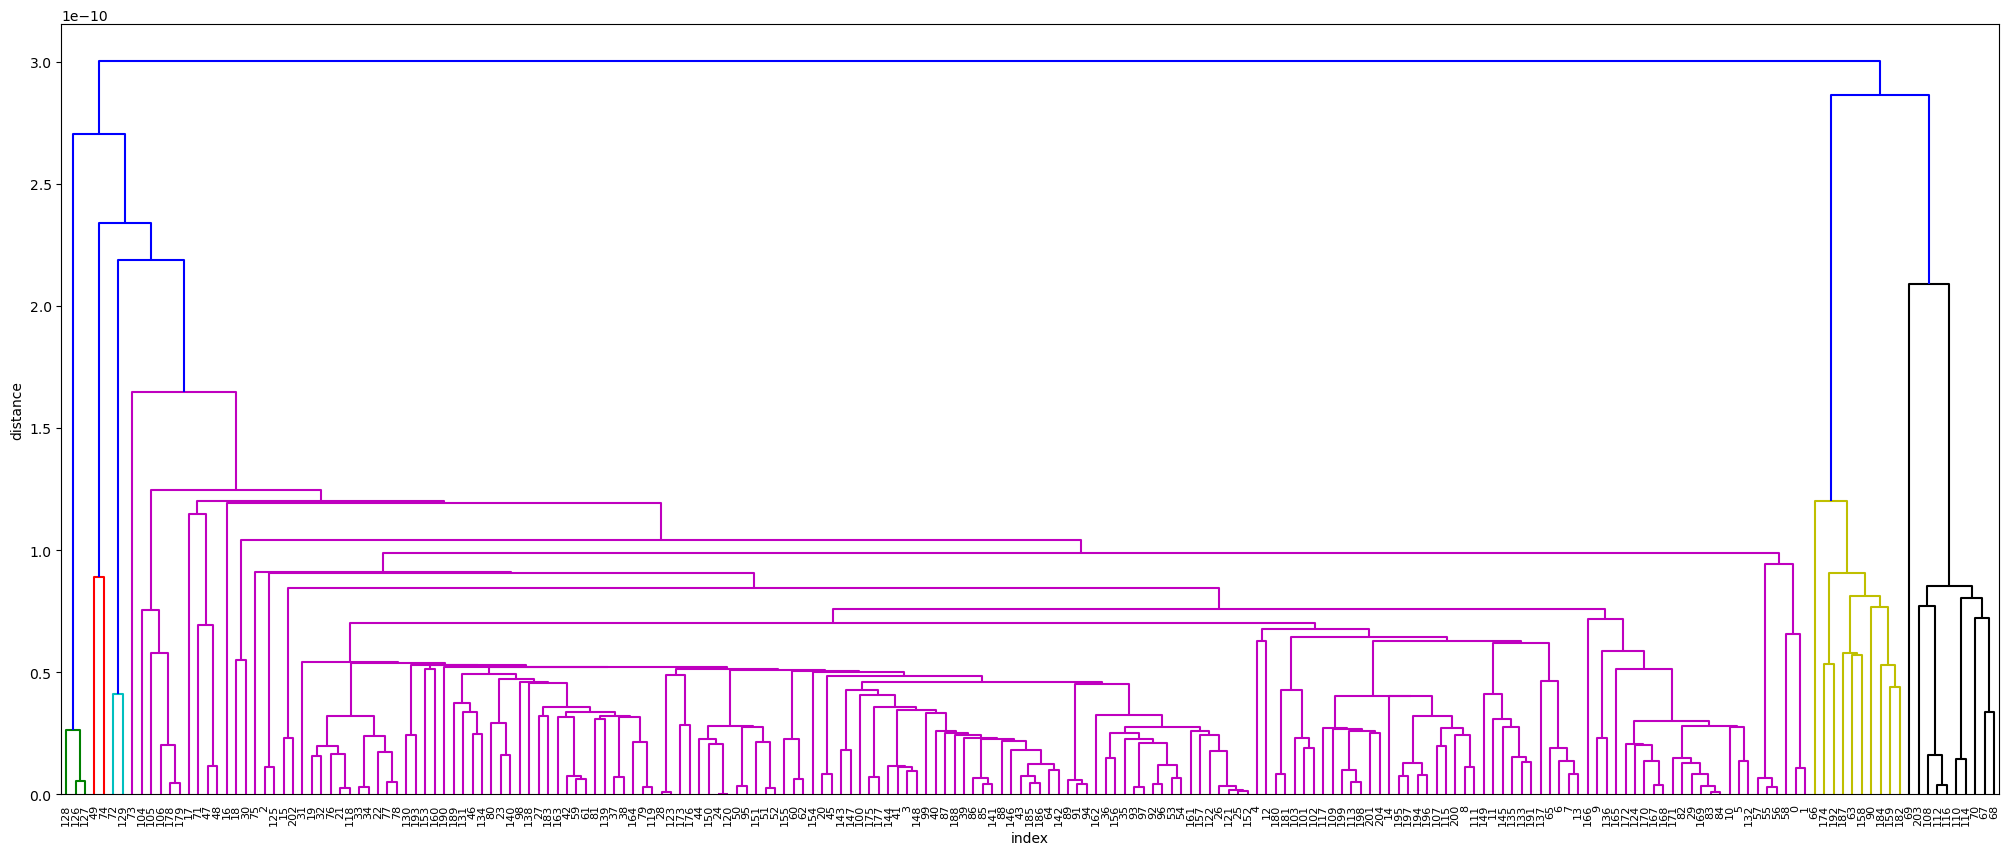

In [188]:
visual('single',810,reduced_data)

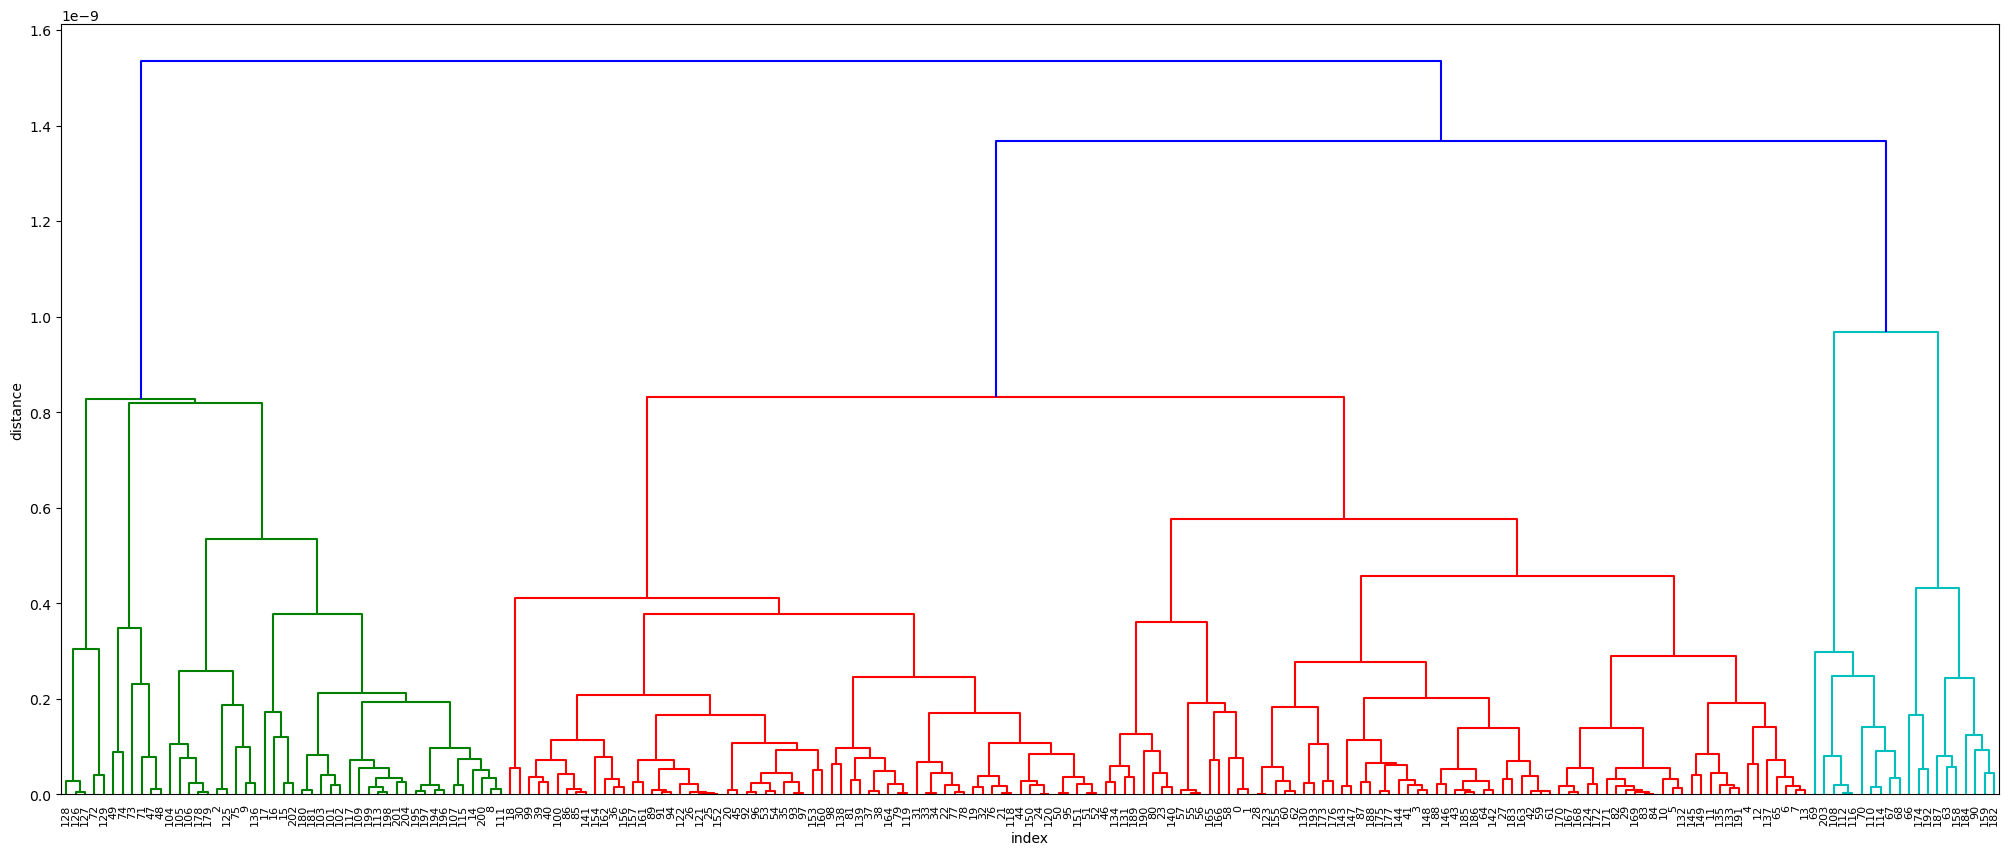

In [189]:
visual('complete', 40000, reduced_data)

In [190]:
# 两点之间的欧氏距离

def pointDistance(point1, point2):
    distance = 0
    for ele in range(len(point1)):
        try:
            distance += (point2[ele] - point1[ele]) ** 2
        except:
            return 0
    return pow(distance,0.5)

def clusterDistance(node1, node2):
    distances=[]
    for i in node1.cluster:
        for j in node2.cluster:
            distances.append(pointDistance(i,j))
    return distances

class Node:
    def __init__(self, x):
        if isinstance(x[0], list):
            self.cluster = [i for i in x]
        else:
            self.cluster = [x]
        self.height = 0
        self.leftchild = None
        self.rightchild = None

# 连接函数

def singleLinkage(node1, node2):
    distances= clusterDistance(node1, node2)
    return(min(distances))

def completeLinkage(node1, node2):
    distances= clusterDistance(node1, node2)
    return(max(distances))

def averageLinkage(node1, node2):
    distances= clusterDistance(node1, node2)
    return(sum(distances)/len(distances))
    
def centroidLinkage(node1, node2):
    centroid1 = list(map(lambda x: sum(x)/len(x), zip(*(node1.cluster))))
    centroid2 = list(map(lambda x: sum(x)/len(x), zip(*(node2.cluster))))
    return(pointDistance(centroid1, centroid2))

# 返回一个元组(i,j,h)，该元组表示接下来要合并第i个和第j个节点，形成一个高度为h的新节点

def clustersToMerge(currentClusters, linkage):
    merge = [0, 0, float('inf')]
    for i in range(len(currentClusters)):
        for j in range(len(currentClusters)):
            if i!=j and j>i:
                cluster1 = currentClusters[i]
                cluster2 = currentClusters[j]
                distance = linkage(cluster1, cluster2)
                if distance < merge[2]:
                    merge[0] = i
                    merge[1] = j
                    merge[2] = distance
    return(tuple(merge))

def updateNode(height, leftchild, rightchild):
    newNode = Node(leftchild.cluster + rightchild.cluster)
    newNode.height = height
    newNode.leftchild = leftchild
    newNode.rightchild = rightchild
    return newNode

def ahc(datapoints, linkage):
    currentClusters = [Node(x) for x in datapoints]
    while len(currentClusters)>1:
        (i, j, h) = clustersToMerge(currentClusters, linkage)
        newNode = updateNode(h, currentClusters[i],currentClusters[j])
        newClusters = [currentClusters[idx] for idx in range(len(currentClusters))  if idx!=i and idx!=j]
        newClusters.append(newNode)
        currentClusters = newClusters.copy()
    return newNode

def cutTree(rootNode, k):
    count = 2
    kNodes = []
    currentNode = rootNode
    kNodes.append(currentNode.leftchild)
    kNodes.append(currentNode.rightchild)
    
    while count < k:
        maxh = max([kNodes[i].height for i in range(len(kNodes))])
        for i in range(len(kNodes)):
            if kNodes[i].height == maxh:
                currentNode = kNodes[i]
                kNodes.remove(kNodes[i])
                kNodes.append(currentNode.leftchild)
                kNodes.append(currentNode.rightchild)
        count += 1
    return [kNodes[i].cluster for i in range(len(kNodes))]

def plotGraph(kClusters, title):
    for i in range(len(kClusters)):
        x, y = zip(*kClusters[i])
        plt.scatter(x, y, alpha=0.6, s=100)
    plt.title(title)
    plt.show()

In [191]:
X = pd.DataFrame(reduced_data.iloc[:,0:2].values)
X = X.values.tolist()

Single Linkage

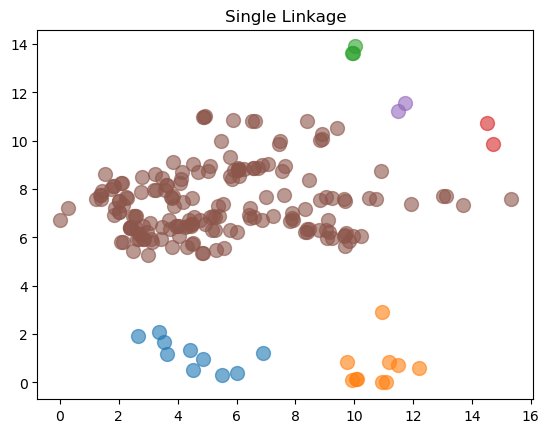

In [192]:
# 基于 Single Linkage 的 Agglomerative Clustering
rootNode = ahc(X, singleLinkage)
kClusters = cutTree(rootNode, k=6)
plotGraph(kClusters, "Single Linkage")

In [193]:
dataf = pd.DataFrame()
index = 0
for i in range(len(kClusters)):
    for points in kClusters[i]:
        dataf.loc[index,'pc1'] = points[0]
        dataf.loc[index,'pc2'] = points[1]
        dataf.loc[index,'cluster'] = i
        index += 1

# AHC 单连接模型评价指标计算
Evaluation = dataf[['pc1','pc2','cluster']]
print( "  AHC 单连接的聚类评价指标 ".center(30,"="))
print('信息熵：', InfoEntropy(Evaluation, 'cluster'))
print('戴维森堡丁指数：', DBI(Evaluation, 'cluster'))
print('轮廓系数：', SilhouetteScore(kmeans[['pc1','pc2']], Evaluation['cluster']))

======  AHC 单连接的聚类评价指标 =======
信息熵： 0.8215581477399363
戴维森堡丁指数： 0.47466783672628327
轮廓系数： -0.41954314243443547


Complete Linkage

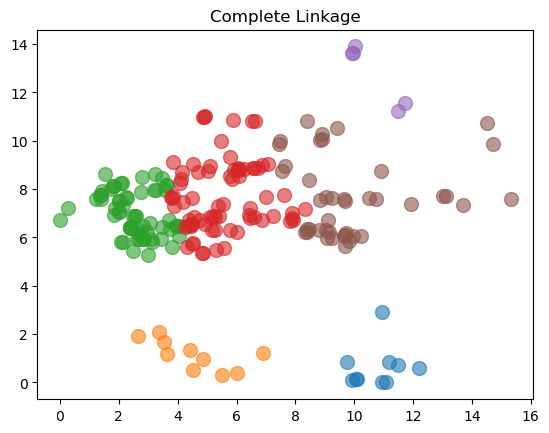

In [194]:
# 基于 Complete Linkage 的 Agglomerative Clustering
rootNode = ahc(X, completeLinkage)
kClusters = cutTree(rootNode, k=6)
plotGraph(kClusters, "Complete Linkage")

In [195]:
dataf = pd.DataFrame()
index = 0
for i in range(len(kClusters)):
    for points in kClusters[i]:
        dataf.loc[index,'pc1'] = points[0]
        dataf.loc[index,'pc2'] = points[1]
        dataf.loc[index,'cluster'] = i
        index += 1

# AHC 全连接模型评价指标计算
Evaluation = dataf[['pc1','pc2','cluster']]
print( "  AHC 全连接的聚类评价指标 ".center(30,"="))
print('信息熵：', InfoEntropy(Evaluation, 'cluster'))
print('戴维森堡丁指数：', DBI(Evaluation, 'cluster'))
print('轮廓系数：', SilhouetteScore(kmeans[['pc1','pc2']], Evaluation['cluster']))

======  AHC 全连接的聚类评价指标 =======
信息熵： 2.0782334112294567
戴维森堡丁指数： 0.7250757444311254
轮廓系数： -0.2229137518823765


Average Linkage

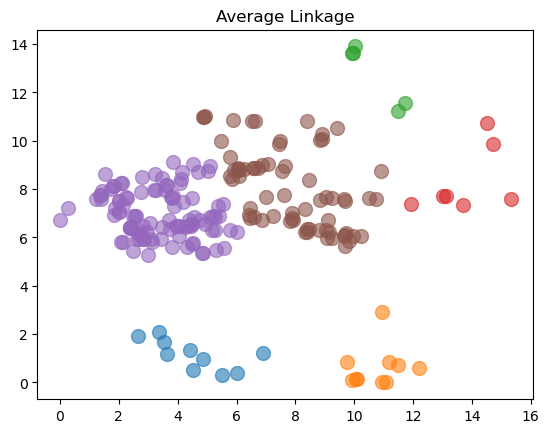

In [196]:
# 基于 Average Linkage 的 Agglomerative Clustering
rootNode = ahc(X, averageLinkage)
kClusters = cutTree(rootNode, k=6)
plotGraph(kClusters, "Average Linkage")

In [197]:
dataf = pd.DataFrame()
index = 0
for i in range(len(kClusters)):
    for points in kClusters[i]:
        dataf.loc[index,'pc1'] = points[0]
        dataf.loc[index,'pc2'] = points[1]
        dataf.loc[index,'cluster'] = i
        index += 1

# AHC 平均连接模型评价指标计算
Evaluation = dataf[['pc1','pc2','cluster']]
print( "  AHC 平均连接的聚类评价指标 ".center(30,"="))
print('信息熵：', InfoEntropy(Evaluation, 'cluster'))
print('戴维森堡丁指数：', DBI(Evaluation, 'cluster'))
print('轮廓系数：', SilhouetteScore(kmeans[['pc1','pc2']], Evaluation['cluster']))

======  AHC 平均连接的聚类评价指标 ======
信息熵： 1.7504115516390732
戴维森堡丁指数： 0.6098103301528062
轮廓系数： -0.3338811628286481
